# P1

In [ ]:
#Step 1: Import the required packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline

# P2

In [ ]:
# Step 2: ImageDataGenerator: data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

#  Load the training Set and test set
training_set = train_datagen.flow_from_directory('base_melanome/training_set',
                                                 target_size = (124, 124),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
test_datagen
test_set = test_datagen.flow_from_directory('base_melanome/test_set',
                                                 target_size = (124, 124),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
num_classes = training_set.num_classes
class_names = list(training_set.class_indices.keys())
num_classes , class_names

Found 512 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


(2, ['benin', 'malin'])

# P3

In [ ]:
# Step 3: Initialising the CNN

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (124, 124, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())# this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
__________

# P4

In [ ]:
# Step 4: Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history= model.fit_generator(training_set,
                         steps_per_epoch = 32,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 16)
# list all data in history
print(history.history.keys())

Epoch 1/10
32/32 [==============================] - 135s 4s/step - loss: 0.6980 - acc: 0.5391 - val_loss: 0.6618 - val_acc: 0.7500
Epoch 2/10
32/32 [==============================] - 47s 1s/step - loss: 0.6702 - acc: 0.6270 - val_loss: 0.5199 - val_acc: 0.8438
Epoch 3/10
32/32 [==============================] - 35s 1s/step - loss: 0.6250 - acc: 0.6582 - val_loss: 0.5373 - val_acc: 0.8203
Epoch 4/10
32/32 [==============================] - 38s 1s/step - loss: 0.6280 - acc: 0.6602 - val_loss: 0.4942 - val_acc: 0.8047
Epoch 5/10
32/32 [==============================] - 41s 1s/step - loss: 0.6033 - acc: 0.7051 - val_loss: 0.4189 - val_acc: 0.8359
Epoch 6/10
32/32 [==============================] - 38s 1s/step - loss: 0.6128 - acc: 0.6914 - val_loss: 0.4512 - val_acc: 0.8281
Epoch 7/10
32/32 [==============================] - 39s 1s/step - loss: 0.5795 - acc: 0.7070 - val_loss: 0.4725 - val_acc: 0.8125
Epoch 8/10
32/32 [==============================] - 36s 1s/step - loss: 0.6013 - acc: 0.7

# P5

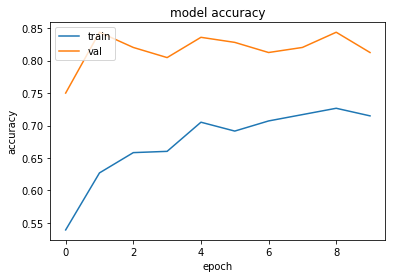

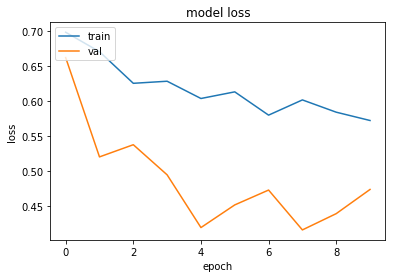

Test-set classification accuracy: 93.75%
Train-set classification accuracy: 60.29%


In [ ]:
#step5: Show the resulats

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

result = model.evaluate_generator(test_set, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))
result = model.evaluate_generator(training_set, steps=1)
print("Train-set classification accuracy: {0:.2%}".format(result[0]))

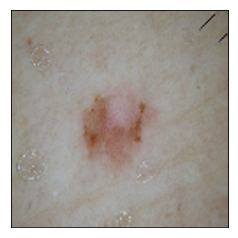

	benin ==> 0.00 %
	malin ==> 100.00 %


In [ ]:
# step 6: Prediction
test_image = image.load_img('base_melanome/test_set/Malin/ISIC_0010514.jpg', target_size = (124,124))

plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1